In [5]:
import maintsim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# serial line no maintenance
line = maintsim.SimulationParameters(
    process_times = [2, 1, 5, 3, 2],
    planned_failures = [(0, 10, 5), (1, 30, 15), (2, 60, 10)],
    sim_time = 100, warmup_time=1000)

scenario1 = maintsim.Scenario(line)

scenario1.simulate()

               processing time units produced       TH MTTF MTTR availability  \
Machine 0                    2             20  0.20202  NaN  NaN           11   
Machine 1                    1             20  0.20202  NaN  NaN           11   
Machine 2                    5             20  0.20202  NaN  NaN           11   
Machine 3                    3             20  0.20202  NaN  NaN           11   
Machine 4                    2             20  0.20202  NaN  NaN           11   
System     bottleneck time = 5             20      0.2  NaN  NaN           11   

           avg queue time  
Machine 0             NaN  
Machine 1             NaN  
Machine 2             NaN  
Machine 3             NaN  
Machine 4             NaN  
System                NaN  


### Single planned failure on M0, critical downtime not exceeded

In [2]:
# single downtime
# serial line CM of planned failures
line = maintsim.SimulationParameters(
    process_times = [4, 2, 5, 3, 2],
    sim_time = 100,

    buffer_sizes = [2]*5,
    
    degradation = [1.]*5,
    
    maint_policy = 'CM',
    repair_dist = 'uniform',
    repair_params = [5, 15],
    queue_discipline = 'fifo',
    maint_capacity = 1,
    
    planned_failures = [(0, 50, 1)],
    
    cm_cost = 100,
    
    warmup_time = 1000)

scenario1 = maintsim.Scenario(line)

scenario1.simulate()

Planned downtime started on machine 0 at t=50

               processing time units produced        TH MTTF MTTR  \
Machine 0                    4             20   0.20202   50    1   
Machine 1                    2             20   0.20202  NaN  NaN   
Machine 2                    5             20   0.20202  NaN  NaN   
Machine 3                    3             19  0.191919  NaN  NaN   
Machine 4                    2             20   0.20202  NaN  NaN   
System     bottleneck time = 5             20       0.2   50    1   

          availability  avg queue time  
Machine 0        10.98          1000.0  
Machine 1           11             NaN  
Machine 2           11             NaN  
Machine 3           11             NaN  
Machine 4           11             NaN  
System          10.996          1000.0  

 Bottleneck machine idle for 0 time units.


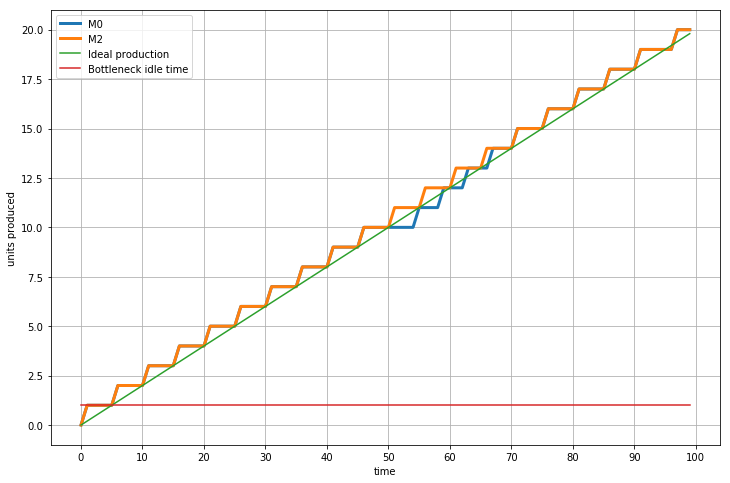

In [3]:
machines = [0,2]
plt.figure(figsize=(12,8))
for i in machines:
    plt.plot(scenario1.production_data.loc[0:,'Machine {} production'.format(i)],
        label='M{}'.format(i), lw=3)
plt.plot(scenario1.production_data.loc[0:,'Ideal production'])
plt.plot(scenario1.production_data.loc[0:,'M2 processing'], label='Bottleneck idle time')
plt.xticks(np.arange(0,101,10), np.arange(0, 101, 10))
plt.xlabel('time')
plt.ylabel('units produced')
plt.legend()
plt.grid()
plt.show()

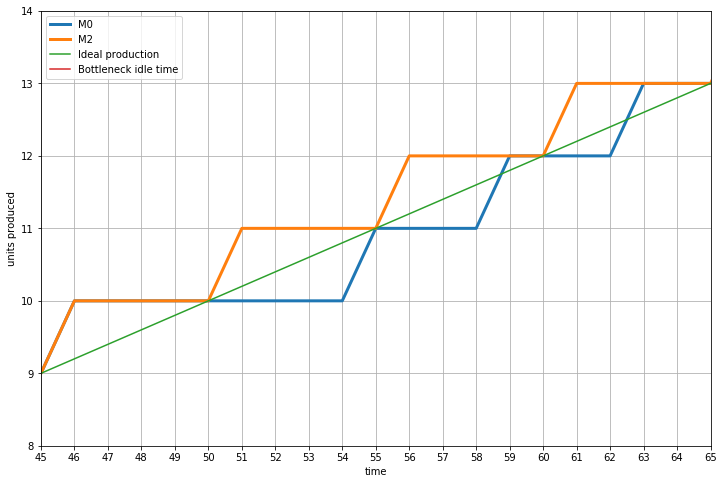

In [4]:
machines = [0,2]
plt.figure(figsize=(12,8))
for i in machines:
    plt.plot(scenario1.production_data.loc[0:,'Machine {} production'.format(i)],
        label='M{}'.format(i), lw=3)
plt.plot(scenario1.production_data.loc[0:,'Ideal production'])
plt.plot(scenario1.production_data.loc[0:,'M2 processing'], label='Bottleneck idle time')
plt.xticks(np.arange(45,66,1), np.arange(45,66,1))
plt.xlabel('time')
plt.ylabel('units produced')
plt.xlim([45, 65])
plt.ylim(8, 14)
plt.legend(loc='upper left')
plt.grid()
plt.show()

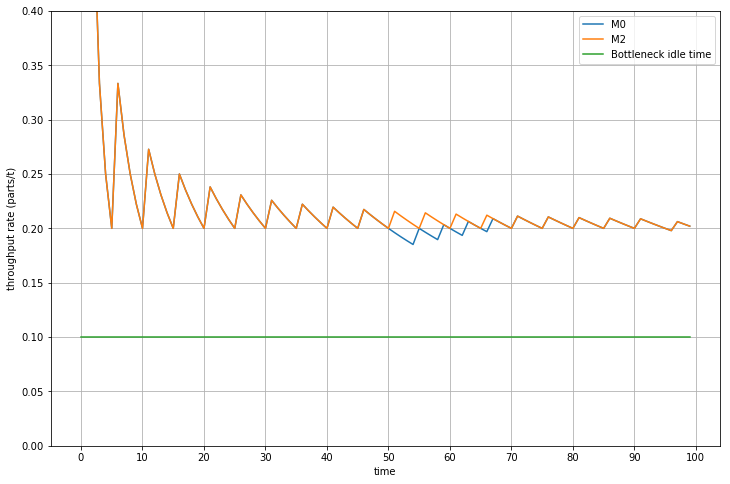

In [37]:
machines = [0,2]
plt.figure(figsize=(12,8))
for i in machines:
    plt.plot(scenario1.production_data.loc[0:,'Machine {} TH'.format(i)],
        label='M{}'.format(i))
#plt.plot(scenario1.production_data.loc[0:,'Ideal production'])
plt.plot(scenario1.production_data.loc[0:,'M2 processing']*0.1, label='Bottleneck idle time')
plt.xticks(np.arange(0,101,10), np.arange(0, 101, 10))
plt.xlabel('time')
plt.ylabel('throughput rate (parts/t)')
plt.ylim([0,0.4])
plt.legend()
plt.grid()
plt.show()

In [3]:
np.mean(scenario1.production_data.loc[0:,'M2 processing'])

1.0

### Single planned failure on M0, critical downtime exceeded

In [2]:
# serial line CM of planned failures
line = maintsim.SimulationParameters(
    process_times = [4, 2, 5, 3, 2],
    sim_time = 100,

    buffer_sizes = [2]*5,
    
    degradation = [1.]*5,
    
    maint_policy = 'CM',
    repair_dist = 'uniform',
    repair_params = [5, 15],
    queue_discipline = 'fifo',
    maint_capacity = 1,
    
    planned_failures = [(0, 50, 20)],
    
    cm_cost = 100,
    
    warmup_time = 1000)

scenario2 = maintsim.Scenario(line)

scenario2.simulate()

Planned downtime started on machine 0 at t=50

               processing time units produced        TH MTTF MTTR  \
Machine 0                    4             17  0.171717   50   20   
Machine 1                    2             19  0.191919  NaN  NaN   
Machine 2                    5             20   0.20202  NaN  NaN   
Machine 3                    3             19  0.191919  NaN  NaN   
Machine 4                    2             20   0.20202  NaN  NaN   
System     bottleneck time = 5             20       0.2   50   20   

          availability  avg queue time  
Machine 0        10.79          1000.0  
Machine 1           11             NaN  
Machine 2           11             NaN  
Machine 3           11             NaN  
Machine 4           11             NaN  
System          10.958          1000.0  

 Bottleneck machine idle for 0 time units.


In [19]:
bottleneck_idle = pd.DataFrame(columns=[str(st) for st in range(50,66)], index=list(range(19,26)))
idle = []
for st in range(50,66):
    for dt in range(19,26):
        line = maintsim.SimulationParameters(
            process_times = [4, 2, 5, 3, 2],
            sim_time = 100,

            buffer_sizes = [2]*5,

            degradation = [1.]*5,

            maint_policy = 'CM',
            repair_dist = 'uniform',
            repair_params = [5, 15],
            queue_discipline = 'fifo',
            maint_capacity = 1,

            planned_failures = [(0, st, dt)],

            cm_cost = 100,

            warmup_time = 1000)

        scenario2 = maintsim.Scenario(line)
        
        bottleneck_idle.loc[dt, str(st)] = scenario2.simulate(summary=False, return_PMOW=True)
        
        #idle += [scenario2.simulate(summary=False, return_PMOW=True)]
print('Done.')

Machine 2 idle from 76 to 77
Machine 2 idle from 76 to 78
Machine 2 idle from 76 to 79
Machine 2 idle from 76 to 80
Machine 2 idle from 76 to 81
Machine 2 idle from 81 to 82
Machine 2 idle from 81 to 82
Machine 2 idle from 81 to 83
Machine 2 idle from 81 to 82
Machine 2 idle from 81 to 83
Machine 2 idle from 81 to 84
Machine 2 idle from 81 to 82
Machine 2 idle from 81 to 83
Machine 2 idle from 81 to 84
Machine 2 idle from 81 to 85
Machine 2 idle from 81 to 82
Machine 2 idle from 81 to 83
Machine 2 idle from 81 to 84
Machine 2 idle from 81 to 85
Machine 2 idle from 81 to 86
Machine 2 idle from 86 to 87
Machine 2 idle from 86 to 87
Machine 2 idle from 86 to 88
Machine 2 idle from 86 to 87
Machine 2 idle from 86 to 88
Machine 2 idle from 86 to 89
Machine 2 idle from 86 to 87
Machine 2 idle from 86 to 88
Machine 2 idle from 86 to 89
Machine 2 idle from 86 to 90
Machine 2 idle from 86 to 87
Machine 2 idle from 86 to 88
Machine 2 idle from 86 to 89
Machine 2 idle from 86 to 90
Machine 2 idle

In [21]:
bottleneck_idle

,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
22,2,0,0,0,1,2,0,0,0,1,2,0,0,0,1,2
23,3,0,0,1,2,3,0,0,1,2,3,0,0,1,2,3
24,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4
25,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5


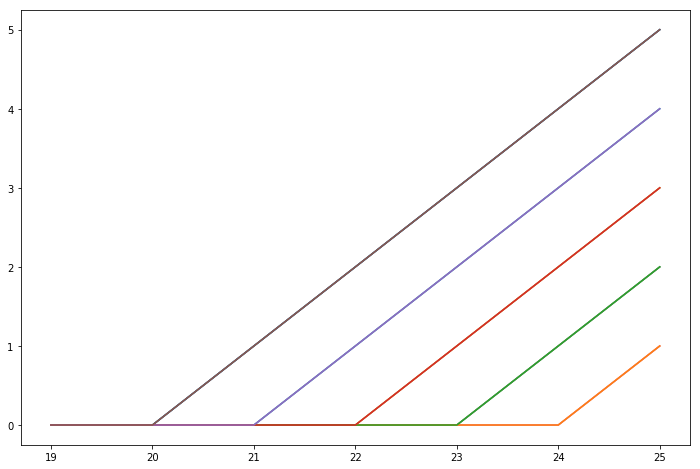

In [20]:
plt.figure(figsize=(12,8))
plt.plot(bottleneck_idle)
plt.show()

In [86]:
scenario2.production_data.loc[70:80]

,Machine 0 production,Machine 1 production,Machine 2 production,Machine 3 production,Machine 4 production,Machine 0 TH,Machine 1 TH,Machine 2 TH,Machine 3 TH,Machine 4 TH,...,M1 running,M2 running,M3 running,M4 running,Ideal production,M0 processing,M1 processing,M2 processing,M3 processing,M4 processing
70,10,13,14,14,14,0.142857,0.185714,0.200000,0.200000,0.200000,...,1,1,1,1,14.0,1,0,1,0,1
71,10,13,15,14,15,0.140845,0.183099,0.211268,0.197183,0.211268,...,1,1,1,1,14.2,1,0,1,0,0
72,10,13,15,14,15,0.138889,0.180556,0.208333,0.194444,0.208333,...,1,1,1,1,14.4,1,0,1,1,0
73,10,13,15,14,15,0.136986,0.178082,0.205479,0.191781,0.205479,...,1,1,1,1,14.6,1,0,1,1,0
74,11,13,15,15,15,0.148649,0.175676,0.202703,0.202703,0.202703,...,1,1,1,1,14.8,1,0,1,0,0
75,11,13,15,15,15,0.146667,0.173333,0.200000,0.200000,0.200000,...,1,1,1,1,15.0,1,1,1,0,1
76,11,14,16,15,16,0.144737,0.184211,0.210526,0.197368,0.210526,...,1,1,1,1,15.2,1,0,1,0,0
77,11,14,16,15,16,0.142857,0.181818,0.207792,0.194805,0.207792,...,1,1,1,1,15.4,1,0,1,1,0
78,12,14,16,15,16,0.153846,0.179487,0.205128,0.192308,0.205128,...,1,1,1,1,15.6,1,0,1,1,0
79,12,14,16,16,16,0.151899,0.177215,0.202532,0.202532,0.202532,...,1,1,1,1,15.8,1,1,1,0,0


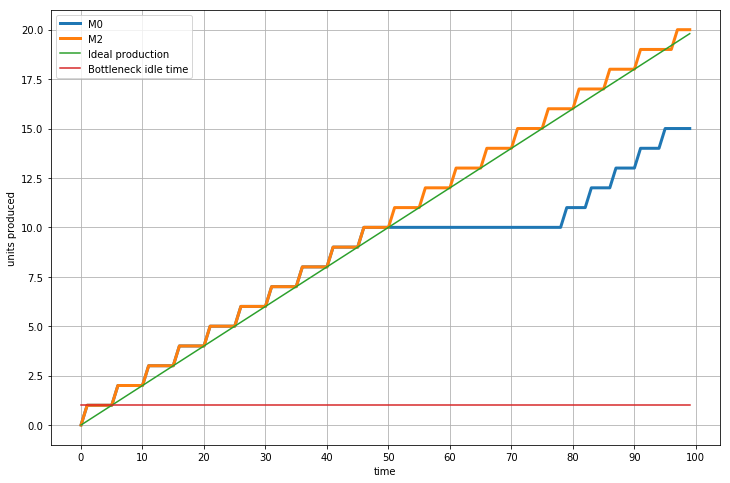

In [21]:
machines = [0,2]
plt.figure(figsize=(12,8))
for i in machines:
    plt.plot(scenario2.production_data.loc[0:,'Machine {} production'.format(i)],
        label='M{}'.format(i), lw=3)
plt.plot(scenario2.production_data.loc[0:,'Ideal production'])
plt.plot(scenario2.production_data.loc[0:,'M2 processing'], label='Bottleneck idle time')
plt.xticks(np.arange(0,101,10), np.arange(0, 101, 10))
plt.xlabel('time')
plt.ylabel('units produced')
plt.legend()
plt.grid()
plt.show()

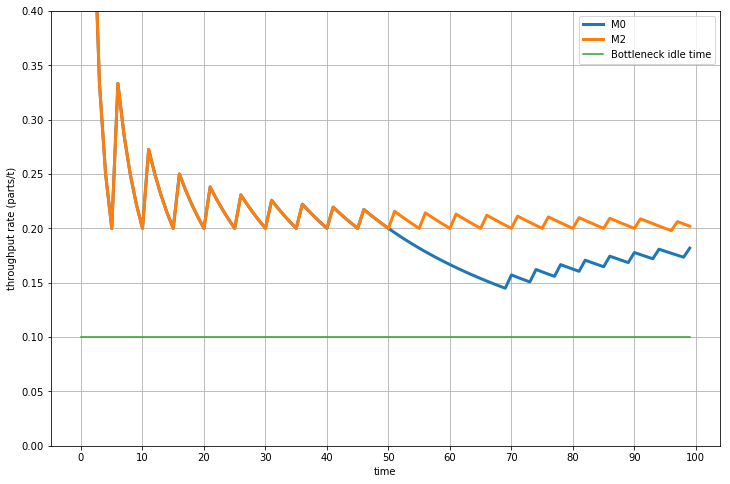

In [49]:
machines = [0,2]
plt.figure(figsize=(12,8))
for i in machines:
    plt.plot(scenario2.production_data.loc[0:,'Machine {} TH'.format(i)],
        label='M{}'.format(i), lw=3)
#plt.plot(scenario1.production_data.loc[0:,'Ideal production'])
plt.plot(scenario2.production_data.loc[0:,'M2 processing']*0.1, label='Bottleneck idle time')
plt.xticks(np.arange(0,101,10), np.arange(0, 101, 10))
plt.xlabel('time')
plt.ylabel('throughput rate (parts/t)')
plt.ylim([0,0.4])
plt.legend()
plt.grid()
plt.show()

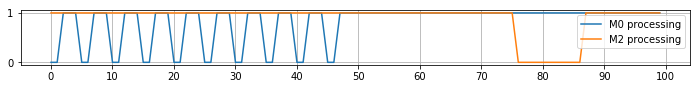

In [15]:
machines = [0,2]
plt.figure(figsize=(12,1))
plt.plot(scenario2.production_data.loc[0:,'M0 processing'])
plt.plot(scenario2.production_data.loc[0:,'M2 processing'])

plt.xticks(np.arange(0,101,10), np.arange(0, 101, 10))
plt.yticks([0,1],[0,1])
plt.legend()
plt.grid()
plt.show()

In [3]:
line = maintsim.SimulationParameters(
    process_times = [4],
    sim_time = 100,

    buffer_sizes = [2],
    
    degradation = [1.],
    
    maint_policy = 'CM',
    repair_dist = 'uniform',
    repair_params = [5, 15],
    queue_discipline = 'fifo',
    maint_capacity = 1,
    
    planned_failures = [(0, 50, 20)],
    
    cm_cost = 100,
    
    warmup_time = 0)

scenario3 = maintsim.Scenario(line)

scenario3.simulate()

0 50
               processing time units produced        TH MTTF MTTR  \
Machine 0                    4             24  0.242424  NaN  NaN   
System     bottleneck time = 4             24      0.24  NaN  NaN   

          availability  avg queue time  
Machine 0            1             NaN  
System               1             NaN  


In [5]:
for dt in scenario2.machines[1].planned_failures:
    print(dt[1])

50


In [6]:
scenario2.production_data

,Machine 0 production,Machine 1 production,Machine 2 production,Machine 3 production,Machine 4 production,Machine 0 TH,Machine 1 TH,Machine 2 TH,Machine 3 TH,Machine 4 TH,M0 running,M1 running,M2 running,M3 running,M4 running,Ideal production
-1000,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,1,1,1,1,-200.0
-999,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,1,1,1,1,-199.8
-998,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,1,1,1,1,-199.6
-997,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,1,1,1,1,-199.4
-996,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,1,1,1,1,-199.2
-995,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,1,1,1,1,-199.0
-994,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,1,1,1,1,-198.8
-993,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,1,1,1,1,-198.6
-992,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,1,1,1,1,-198.4
-991,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,1,1,1,1,-198.2
